In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Programming\ML_DATA\Heart Disease\\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Data Visualization

In [6]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [7]:
len(df.target)

1025

In [8]:
NoDisease = len(df[df.target == 0])
HaveDisease = len(df[df.target == 1])

print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((NoDisease / len(df.target)) * 100))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((HaveDisease / len(df.target)) * 100)) 

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


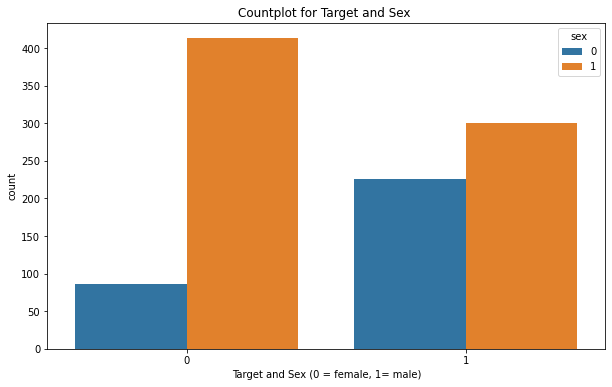

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='target',data=df, hue='sex') 
plt.title("Countplot for Target and Sex ")
plt.xlabel("Target and Sex (0 = female, 1= male)")
plt.show()

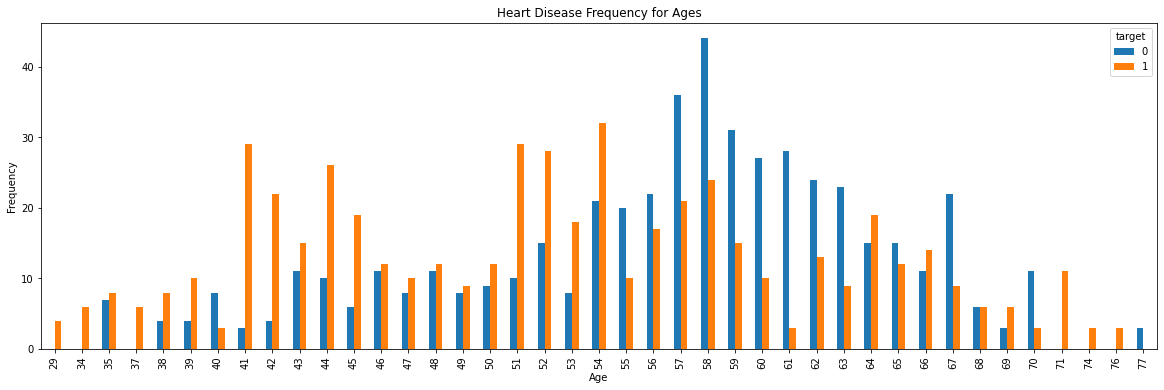

In [10]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
x = df.drop('target',axis=1)
y = df.target

In [14]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [16]:
y.tail()

1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, dtype: int64

# training test split

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.70,random_state=51)

In [21]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
582,55,1,1,130,262,0,1,155,0,0.0,2,0,2
907,50,0,1,120,244,0,1,162,0,1.1,2,0,2
183,42,1,2,130,180,0,1,150,0,0.0,2,0,2
743,58,1,1,125,220,0,1,144,0,0.4,1,4,3
126,66,1,0,120,302,0,0,151,0,0.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,52,1,1,120,325,0,1,172,0,0.2,2,0,2
736,59,1,0,110,239,0,0,142,1,1.2,1,1,3
485,62,1,1,120,281,0,0,103,0,1.4,1,1,3
57,48,1,1,130,245,0,0,180,0,0.2,1,0,2


In [22]:
y_train

582     1
907     1
183     1
743     1
126     1
       ..
969     1
736     0
485     0
57      1
1022    0
Name: target, Length: 717, dtype: int64

# Decision Tree 

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
clf = DecisionTreeClassifier()

In [26]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
clf.score(x_test,y_test)

0.9902597402597403

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
clf2 = RandomForestClassifier()

In [37]:
clf2.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
clf2.score(x_test,y_test)

1.0

In [39]:
x_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
582,55,1,1,130,262,0,1,155,0,0.0,2,0,2
907,50,0,1,120,244,0,1,162,0,1.1,2,0,2
183,42,1,2,130,180,0,1,150,0,0.0,2,0,2
743,58,1,1,125,220,0,1,144,0,0.4,1,4,3
126,66,1,0,120,302,0,0,151,0,0.4,1,0,2


In [40]:
clf2.predict([[55,1,1,130,262,0,1,155,0,0.0,2,0,2]])

array([1], dtype=int64)

In [41]:
y_train.head(2)

582    1
907    1
Name: target, dtype: int64